<a href="https://colab.research.google.com/github/Aman-Gautam1/Sentiment-Analysis-Bidirectional-LSTM/blob/master/sentiment_bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import warnings
import re
import string
import random



import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer , TweetTokenizer
from nltk.stem import WordNetLemmatizer ,PorterStemmer
from nltk.corpus import stopwords
from collections import defaultdict
from collections import Counter
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import tensorflow as tf

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


nlp = spacy.load("en_core_web_sm")
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/sentiment_analysis_using_bidirectional_LSTM/sentimentAnalysis/twitter_training.csv")
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [ ]:
df.rename(columns={'2401':'Index','Borderlands':'land','Positive':'Mode','im getting on borderlands and i will murder you all ,':'text'},inplace = True)


In [ ]:
df.head()

,Index,land,Mode,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df.shape

(74681, 4)

In [ ]:
df.Mode.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [ ]:
df.dtypes

Index     int64
land     object
Mode     object
text     object
dtype: object

In [ ]:
df.describe()

,Index
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [ ]:
print(f'{df.isnull().sum()}')

Index      0
land       0
Mode       0
text     686
dtype: int64


In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df.land.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [ ]:
df.rename(columns={'land':"GameType"},inplace = True)

In [ ]:
df.GameType.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [ ]:
platform = df.GameType.value_counts()
platform.to_frame()

,count
GameType,
TomClancysRainbowSix,2328
Verizon,2319
MaddenNFL,2315
CallOfDuty,2314
Microsoft,2304
WorldOfCraft,2300
NBA2K,2299
LeagueOfLegends,2296
TomClancysGhostRecon,2291


<ipython-input-47-6d8bf2d02150>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=platform.values[:10] ,y=platform.index[:10] , palette='rocket')


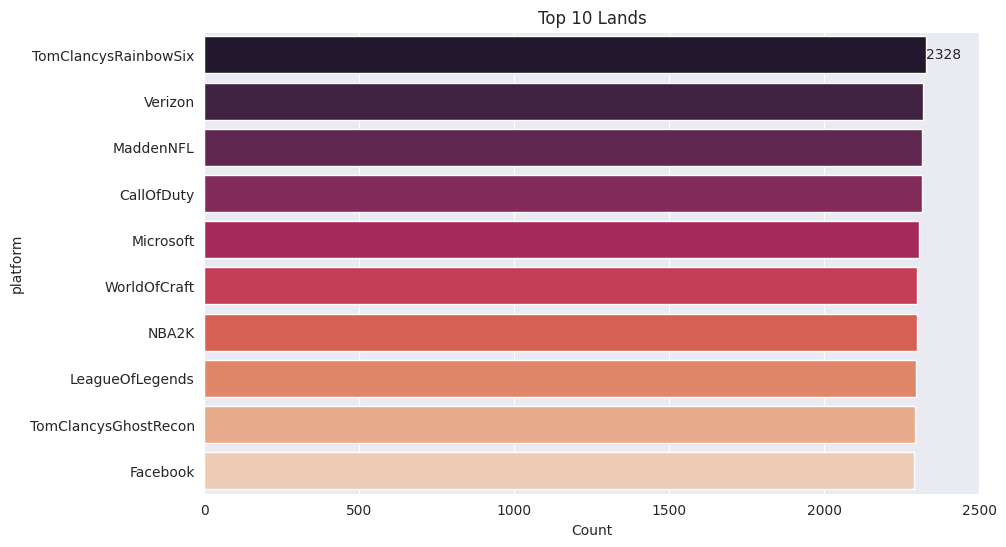

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
bar = sns.barplot(x=platform.values[:10] ,y=platform.index[:10] , palette='rocket')
bar.bar_label(bar.containers[0])
plt.title('Top 10 Lands')
plt.xlabel('Count')
plt.ylabel('platform')
plt.xlim(0 , 2500)
plt.show()

In [ ]:
mode = df.Mode.value_counts()
mode.to_frame().T

Mode,Negative,Positive,Neutral,Irrelevant
count,21698,19712,17708,12537


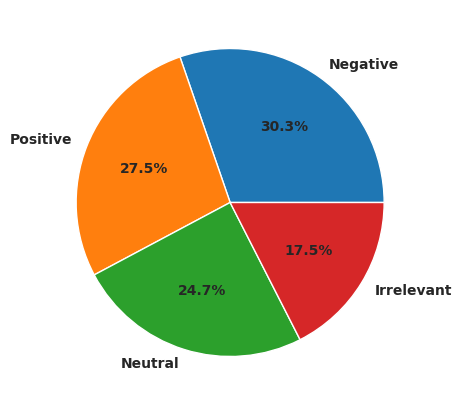

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(x=mode.values,labels=mode.keys(),textprops={"fontsize":10,"fontweight":"black"},autopct="%1.1f%%")
plt.show();

In [ ]:
pd.crosstab(df.Mode , df.GameType).T.style.background_gradient( subset=['Negative'],cmap='Reds')\
.background_gradient(subset=['Positive'] , cmap='Greens')\
.background_gradient(subset=['Irrelevant'] , cmap='BuGn')

Mode,Irrelevant,Negative,Neutral,Positive
GameType,,,,
Amazon,185,565,1197,302
ApexLegends,185,574,913,606
AssassinsCreed,256,365,153,1382
Battlefield,907,445,342,561
Borderlands,238,415,581,971
CS-GO,620,335,523,717
CallOfDuty,660,861,367,426
CallOfDutyBlackopsColdWar,545,540,340,817
Cyberpunk2077,457,360,456,902


In [ ]:
sent = df.text
sent

0        I am coming to the borders and I will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    Just realized that the Windows partition of my...
74677    Just realized that my Mac window partition is ...
74678    Just realized the windows partition of my Mac ...
74679    Just realized between the windows partition of...
74680    Just like the windows partition of my Mac is l...
Name: text, Length: 71655, dtype: object

In [ ]:
import re

In [ ]:
def clean_emojis(tx):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols
                           u"\U0001F680-\U0001F6FF"  # transport
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', tx)
def text_cleaner(tx):

    text = re.sub(r"won\'t", "would not", tx)
    text = re.sub(r"im", "i am", tx)
    text = re.sub(r"Im", "I am", tx)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"don\'t", "do not", text)
    text = re.sub(r"shouldn\'t", "should not", text)
    text = re.sub(r"needn\'t", "need not", text)
    text = re.sub(r"hasn\'t", "has not", text)
    text = re.sub(r"haven\'t", "have not", text)
    text = re.sub(r"weren\'t", "were not", text)
    text = re.sub(r"mightn\'t", "might not", text)
    text = re.sub(r"didn\'t", "did not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\!\?\.\@]',' ' , text)
    text = re.sub(r'[!]+' , '!' , text)
    text = re.sub(r'[?]+' , '?' , text)
    text = re.sub(r'[.]+' , '.' , text)
    text = re.sub(r'[@]+' , '@' , text)
    text = re.sub(r'unk' , ' ' , text)
    text = re.sub('\n', '', text)
    text = text.lower()
    text = re.sub(r'[ ]+' , ' ' , text)

    return text

In [ ]:
import numpy as np
import random
#random.seed(0)
clean_text = text_cleaner(random.choice(sent))
clean_text = clean_emojis(clean_text)
clean_text

'i the dota 2 am true sight dog series is not so fcking cool i wish we could get something like that for owl'

In [ ]:
doc = nlp(clean_text)
for token in doc :
    print(f'{token} => {token.pos_}')

i => PRON
the => DET
dota => PROPN
2 => NUM
am => AUX
true => ADJ
sight => NOUN
dog => NOUN
series => NOUN
is => AUX
not => PART
so => ADV
fcking => ADJ
cool => INTJ
i => PRON
wish => VERB
we => PRON
could => AUX
get => VERB
something => PRON
like => ADP
that => PRON
for => ADP
owl => NOUN


In [ ]:
doc = nlp(clean_text)
for chunk in doc.ents:
    print(f'{chunk} => {chunk.label_}')

2 => CARDINAL


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import RegexpTokenizer
Tokenizer=RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(lambda x : text_cleaner(x))
df['text']= df['text'].apply(lambda x : Tokenizer.tokenize(x))
df['text'].to_frame()

,text
0,"[i, am, coming, to, the, borders, and, i, will..."
1,"[im, getting, on, borderlands, and, i, will, k..."
2,"[im, coming, on, borderlands, and, i, will, mu..."
3,"[im, getting, on, borderlands, 2, and, i, will..."
4,"[im, getting, into, borderlands, and, i, can, ..."
...,...
74676,"[just, realized, that, the, windows, partition..."
74677,"[just, realized, that, my, mac, window, partit..."
74678,"[just, realized, the, windows, partition, of, ..."
74679,"[just, realized, between, the, windows, partit..."


In [ ]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
Stemmer = PorterStemmer()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def stopwords_cleaner(text):
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in text if word.lower() not in set(stopwords.words('english'))]
    cleaned_text = ' '.join(words)
    return cleaned_text

# Assuming df is your DataFrame and 'text' is the column containing text data
df['text'] = df['text'].apply(stopwords_cleaner)

In [ ]:
df['text'][:10].to_frame()

,text
0,come border kill
1,im get borderland kill
2,im come borderland murder
3,im get borderland 2 murder
4,im get borderland murder
5,spent hour make someth fun know huge borderlan...
6,spent coupl hour someth fun know huge borderla...
7,spent hour someth fun know huge borderland fan...
8,spent hour make someth fun know huge rhandlerr...
9,2010 spent hour make someth fun know huge rhan...


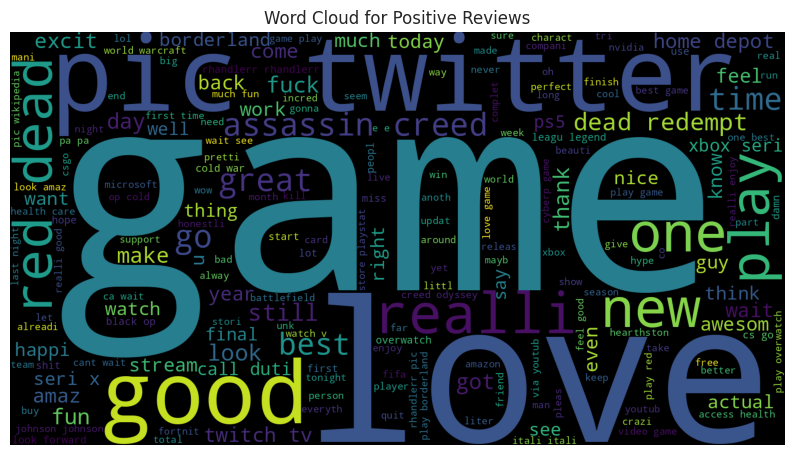

In [ ]:
from wordcloud import WordCloud

positive_reviews = df[df['Mode'] == 'Positive']['text']
pos = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                         #stopwords=set(stopwords.words('english')),
                          min_font_size=15).generate(pos)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show();

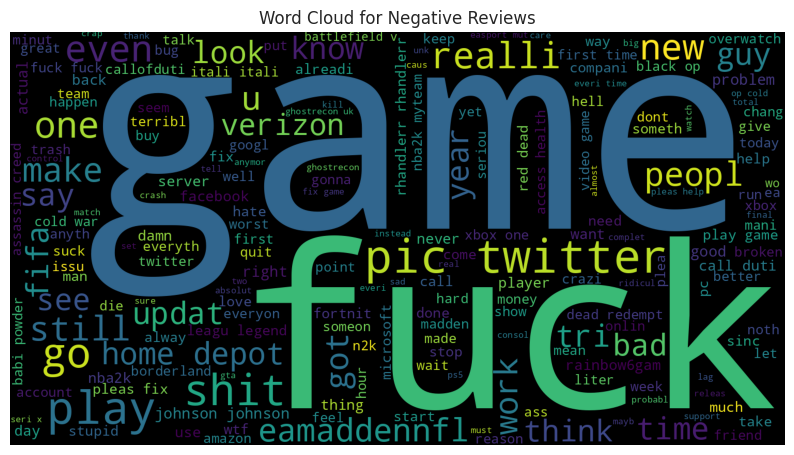

In [ ]:
neg_reviews = df[df["Mode"]=="Negative"]['text']
neg = " ".join(map(str,neg_reviews))
neg_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',

                          min_font_size=15).generate(neg)
plt.figure(figsize=(10, 10))
plt.imshow(neg_wordcloud)
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

In [ ]:
len_text = [len(tx) for tx in df['text'].to_list()]
print(f'Max Length : {np.max(len_text)}')
print(f'Min Length : {np.min(len_text)}')
print(f'Mean Length : {round(np.mean(len_text),2)}')
print(f'Std Length : {round(np.std(len_text),2)}')
print(f'Mew + 2sigma : {round(np.mean(len_text)+ 2 *np.std(len_text),2)}')

Max Length : 797
Min Length : 0
Mean Length : 67.68
Std Length : 49.01
Mew + 2sigma : 165.7


In [ ]:
df['sentiments'] = df['Mode'].replace({'Positive' : 1 ,  'Negative' : 0 ,'Neutral':2 , 'Irrelevant' : 2 })

In [ ]:
df.sample(5)

,Index,GameType,Mode,text,sentiments
36887,8328,Microsoft,Positive,peac may final restor thank microsoft,1
73924,9064,Nvidia,Neutral,nvidia say store overrun malici bot cooki rtx ...,2
39525,5584,Hearthstone,Positive,fascin play fairi post winterveil grandma sylv...,1
74312,9135,Nvidia,Positive,congrat nvidia research team 1 0 0 releas cand...,1
63706,7717,MaddenNFL,Positive,dylan cole list 71 superstar 2015 nfl 21 launc...,1


In [ ]:
sent =df["text"]

In [ ]:
X = df.drop(["sentiments","Mode"],axis = 1)
print(X)

       Index     GameType                                               text
0       2401  Borderlands                                   come border kill
1       2401  Borderlands                             im get borderland kill
2       2401  Borderlands                          im come borderland murder
3       2401  Borderlands                         im get borderland 2 murder
4       2401  Borderlands                           im get borderland murder
...      ...          ...                                                ...
74676   9200       Nvidia  realiz window partit mac like 6 year behind nv...
74677   9200       Nvidia  realiz mac window partit 6 year behind nvidia ...
74678   9200       Nvidia  realiz window partit mac 6 year behind nvidia ...
74679   9200       Nvidia  realiz window partit mac like 6 year behind nv...
74680   9200       Nvidia  like window partit mac like 6 year behind driv...

[71655 rows x 3 columns]


In [ ]:
y = df["sentiments"]

In [ ]:
X.shape

(71655, 3)

In [ ]:
y.shape

(71655,)

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
voc_size  = 10000

In [ ]:
mess = X.copy()

In [ ]:
mess["text"][1]

'im get borderland kill'

In [ ]:
mess.reset_index(inplace = True)

In [ ]:
mess

,index,Index,GameType,text
0,0,2401,Borderlands,come border kill
1,1,2401,Borderlands,im get borderland kill
2,2,2401,Borderlands,im come borderland murder
3,3,2401,Borderlands,im get borderland 2 murder
4,4,2401,Borderlands,im get borderland murder
...,...,...,...,...
71650,74676,9200,Nvidia,realiz window partit mac like 6 year behind nv...
71651,74677,9200,Nvidia,realiz mac window partit 6 year behind nvidia ...
71652,74678,9200,Nvidia,realiz window partit mac 6 year behind nvidia ...
71653,74679,9200,Nvidia,realiz window partit mac like 6 year behind nv...


In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0,len(mess)):
  review = mess['text'][i]
  review = review.lower()

  corpus.append(review)

In [ ]:
corpus

['come border kill',
 'im get borderland kill',
 'im come borderland murder',
 'im get borderland 2 murder',
 'im get borderland murder',
 'spent hour make someth fun know huge borderland fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi5wf9jg',
 'spent coupl hour someth fun know huge borderland fan maya one favorit charact decid make wallpap pc origin pictur compar creation made fun pic twitter com mlsi5wf9jg',
 'spent hour someth fun know huge borderland fan maya one favorit charact',
 'spent hour make someth fun know huge rhandlerr fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi5wf9jg',
 '2010 spent hour make someth fun know huge rhandlerr fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi5wf9jg',
 '',
 'rock hard la varlop rare power handsom jackpot borderland 3 xbox dlvr rmtrgf',
 'rock hard la varlop r

In [ ]:
onehot_repr = [one_hot(words,voc_size) for words in corpus]
onehot_repr

[[7649, 6421, 1321],
 [8600, 4286, 7267, 1321],
 [8600, 7649, 7267, 6936],
 [8600, 4286, 7267, 4847, 6936],
 [8600, 4286, 7267, 6936],
 [7904,
  6964,
  7961,
  8338,
  663,
  9606,
  8312,
  7267,
  2414,
  6224,
  6354,
  1000,
  6938,
  9096,
  7961,
  9969,
  9173,
  9301,
  7624,
  1580,
  1511,
  7923,
  2761,
  7095,
  6265,
  3942,
  7418],
 [7904,
  9704,
  6964,
  8338,
  663,
  9606,
  8312,
  7267,
  2414,
  6224,
  6354,
  1000,
  6938,
  9096,
  7961,
  9969,
  9173,
  9301,
  9758,
  3867,
  1511,
  7923,
  663,
  7095,
  6265,
  3942,
  7418],
 [7904, 6964, 8338, 663, 9606, 8312, 7267, 2414, 6224, 6354, 1000, 6938],
 [7904,
  6964,
  7961,
  8338,
  663,
  9606,
  8312,
  6010,
  2414,
  6224,
  6354,
  1000,
  6938,
  9096,
  7961,
  9969,
  9173,
  9301,
  7624,
  1580,
  1511,
  7923,
  2761,
  7095,
  6265,
  3942,
  7418],
 [8513,
  7904,
  6964,
  7961,
  8338,
  663,
  9606,
  8312,
  6010,
  2414,
  6224,
  6354,
  1000,
  6938,
  9096,
  7961,
  9969,
  9173,
 

In [ ]:
corpus[1]

'im get borderland kill'

In [ ]:
onehot_repr[1]

[8600, 4286, 7267, 1321]

In [ ]:
sent_length = 60
embedded_docs = pad_sequences(onehot_repr,padding = 'pre',maxlen = sent_length)
print(embedded_docs)

[[   0    0    0 ... 7649 6421 1321]
 [   0    0    0 ... 4286 7267 1321]
 [   0    0    0 ... 7649 7267 6936]
 ...
 [   0    0    0 ...   29 4215 8593]
 [   0    0    0 ... 4215 9811 8593]
 [   0    0    0 ...   29 4215 8593]]


In [ ]:
embedded_docs[730]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 4602, 8126,  216,  549,  430, 6433, 7240, 7267, 8724,
       5033, 8580, 3867, 7585, 8724], dtype=int32)

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
# creating the model
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=voc_size, output_dim=embedding_dim, input_length=sent_length))
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Bidirectional(LSTM(units=32)))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 60, 100)           1000000   
                                                                 
 bidirectional_8 (Bidirecti  (None, 60, 128)           84480     
 onal)                                                           
                                                                 
 bidirectional_9 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1125891 (4.29 MB)
Trainable params: 1125891 (4.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
len(embedded_docs),y.shape

(71655, (71655,))

In [ ]:
import numpy as np
X_final = np.array(embedded_docs)
y_final = np.array(y,dtype=np.int32)

In [ ]:
X_final.shape,y_final.shape

((71655, 60), (71655,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.25)

In [ ]:
import tensorflow as tf

early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=5)

In [ ]:
val_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/sentiment_analysis_using_bidirectional_LSTM/sentimentAnalysis/twitter_validation.csv")
val_df

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
val_df.columns

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')

In [ ]:
val_df.rename(columns={'3364':'Index','Facebook':'land','Irrelevant':'Mode','I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣':'text'},inplace = True)
val_df

,Index,land,Mode,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
val_df['sentiments'] = val_df['Mode'].replace({'Positive' : 1 ,  'Negative' : 0 ,'Neutral':2 , 'Irrelevant' : 2 })

In [ ]:
val_X = val_df.drop(["sentiments","Mode"],axis = 1)
val_y = val_df["sentiments"]

In [ ]:
val_X

,Index,land,text
0,352,Amazon,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Now the President is slapping Americans in the...
4,6273,FIFA,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...
994,4891,GrandTheftAuto(GTA),⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Bought a fraction of Microsoft today. Small wins.


In [ ]:
val_y

0      2
1      0
2      0
3      2
4      0
      ..
994    2
995    2
996    1
997    1
998    2
Name: sentiments, Length: 999, dtype: int64

In [ ]:
voc_size = 10000

In [ ]:
messages = val_X.copy()

In [ ]:
messages['text'][1]

'@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄'

In [ ]:
messages.reset_index(inplace = True)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corp = []
for i in range(0,len(messages)):
  review = re.sub('[^a-zA-Z0-9]', ' ',messages['text'][i])
  review = review.lower()
  review  = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corp.append(review)

In [ ]:
corp

['bbc news amazon boss jeff bezo reject claim compani act like drug dealer bbc co uk news av busin',
 'microsoft pay word function poorli samsungu chromebook',
 'csgo matchmak full closet hack truli aw game',
 'presid slap american face realli commit unlaw act acquitt discov googl vanityfair com news 2020 02',
 'hi eahelp madelein mccann cellar past 13 year littl sneaki thing escap whilst load fifa point took card use paypal account work help resolv pleas',
 'thank eamaddennfl new te austin hooper orang brown brown austinhooper18 pic twitter com grg4xzfkon',
 'rocket leagu sea thiev rainbow six sieg love play three stream best stream twitch rocketleagu seaofthiev rainbowsixsieg follow',
 'ass still knee deep assassin creed odyssey way anytim soon lmao',
 'fix jesu pleas fix world go playstat askplayst playstationsup treyarch callofduti neg 345 silver wolf error code pic twitter com ziryhrf59q',
 'profession dota 2 scene fuck explod complet welcom get garbag',
 'itch assassin tccgif ass

In [ ]:
onehot_repr1 = [one_hot(words,voc_size) for words in corp]
onehot_repr1

[[6638,
  5570,
  8309,
  8555,
  4222,
  1356,
  4873,
  8075,
  5976,
  5882,
  2369,
  1624,
  4570,
  6638,
  3807,
  9213,
  5570,
  8233,
  5854],
 [8843, 6344, 8862, 564, 46, 4833, 6039],
 [4703, 8314, 1649, 2672, 3794, 2018, 631, 8724],
 [9917,
  827,
  6441,
  1266,
  9475,
  6448,
  6409,
  5882,
  4439,
  8531,
  6735,
  8193,
  3942,
  5570,
  5803,
  5532],
 [9729,
  6424,
  3231,
  5893,
  2981,
  8918,
  1199,
  5033,
  1714,
  105,
  8126,
  1600,
  3015,
  5594,
  2536,
  2766,
  3637,
  3821,
  36,
  8248,
  540,
  5607,
  5923,
  4530,
  8463],
 [8205,
  2540,
  6384,
  7388,
  7163,
  606,
  8541,
  6399,
  6399,
  5770,
  7095,
  6265,
  3942,
  7394],
 [5004,
  2472,
  5445,
  6745,
  7562,
  8722,
  9775,
  1431,
  2783,
  6558,
  6536,
  8831,
  6536,
  5686,
  8366,
  1354,
  676,
  6082],
 [4030, 7, 5530, 5381, 2689, 816, 937, 6560, 4157, 5929, 3181],
 [3309,
  169,
  8463,
  3309,
  6206,
  1647,
  3476,
  2842,
  573,
  3022,
  7724,
  5586,
  3968,
  5622,


In [ ]:
sent_length =60
embedded_docs1 = pad_sequences(onehot_repr1,padding = 'pre',maxlen = sent_length)
print(embedded_docs1)

[[   0    0    0 ... 5570 8233 5854]
 [   0    0    0 ...   46 4833 6039]
 [   0    0    0 ... 2018  631 8724]
 ...
 [   0    0    0 ... 7613 6573 4833]
 [   0    0    0 ... 7316 3739 4741]
 [   0    0    0 ... 8878 3807 6532]]


In [ ]:
import numpy as np
v_X = np.array(embedded_docs1,dtype=np.int32)
v_y = np.array(val_y,dtype=np.int32)


In [ ]:
model.fit(X_final,y_final,validation_data=(v_X,v_y),epochs = 20,batch_size=64,callbacks=[early_stopping_callback])

Epoch 1/20
1120/1120 [==============================] - 282s 244ms/step - loss: 0.6729 - accuracy: 0.7088 - val_loss: 0.4172 - val_accuracy: 0.8579
Epoch 2/20
1120/1120 [==============================] - 269s 240ms/step - loss: 0.3920 - accuracy: 0.8470 - val_loss: 0.4000 - val_accuracy: 0.8849
Epoch 3/20
1120/1120 [==============================] - 275s 246ms/step - loss: 0.2955 - accuracy: 0.8836 - val_loss: 0.3724 - val_accuracy: 0.9039
Epoch 4/20
1120/1120 [==============================] - 265s 237ms/step - loss: 0.2361 - accuracy: 0.9061 - val_loss: 0.4163 - val_accuracy: 0.9009
Epoch 5/20
1120/1120 [==============================] - 265s 237ms/step - loss: 0.1956 - accuracy: 0.9224 - val_loss: 0.4477 - val_accuracy: 0.9139
Epoch 6/20
1120/1120 [==============================] - 262s 234ms/step - loss: 0.1673 - accuracy: 0.9322 - val_loss: 0.4671 - val_accuracy: 0.9129
Epoch 7/20
1120/1120 [==============================] - 267s 239ms/step - loss: 0.1452 - accuracy: 0.9408 - val_